In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 7\ Assignment/model_v4.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 7\ Assignment/utils_v4.py /content

In [4]:
import model_v4
import utils_v4
from model_v4 import Net
from utils_v4 import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CUDA Available? True
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CUDA Available? True


In [5]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.1407,), (0.4081,)) --> This is incorrect line and hence commented
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [6]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
#test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms) --> Commented the incorrect line. train = False and test_transform needs to be passed
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 405173968.39it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 55287856.61it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 120609884.67it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17854291.25it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [7]:
type(train_data), len(train_data), len(train_data[0]), train_data.data.shape, test_data.data.shape

(torchvision.datasets.mnist.MNIST,
 60000,
 2,
 torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]))

In [8]:
batch_size = 128

#kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True} --> Commented the incorrect line. shuffle parameter needs to be True
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

#test_loader = torch.utils.data.DataLoader(train_data, **kwargs) --> Commented the incorrect line. test_data needs be passed for test_loader
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

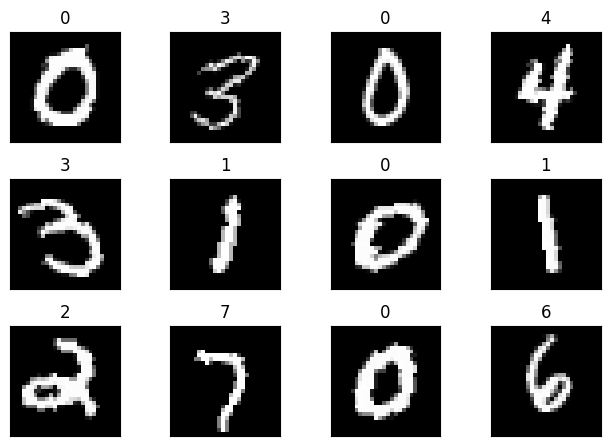

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [ ]:
from tqdm import tqdm

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [10]:
!pip install torchsummary
from torchsummary import summary

In [11]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,168
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             170
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
          Dropout-12           [-1, 10, 24, 24]               0
           Conv2d-13            [-1, 8, 22, 22]             728
             ReLU-14            [-1, 8,

In [12]:
import torch.optim.lr_scheduler as lrs

In [ ]:
model = Net().to(device)
#optimizer = optim.SGD(model.parameters(), lr=10.01, momentum=0.9) -- Commented the line since learning rate needs to be corrected
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = lrs.ReduceLROnPlateau(optimizer, 'min',patience = 3, verbose=True)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
#criterion = F.nll_loss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_loss = train(model, device, train_loader, optimizer, criterion)
  #test(model, device, train_loader) --> Removed this incorrect line. test_loader needs to be passed here
  test(model, device, test_loader, criterion)
  scheduler.step(train_loss)

Epoch 1


Train: Loss=0.0471 Batch_id=468 Accuracy=89.85: 100%|██████████| 469/469 [00:25<00:00, 18.12it/s]


Test set: Average loss: 0.0708, Accuracy: 9784/10000 (97.84%)

Epoch 2


Train: Loss=0.0759 Batch_id=468 Accuracy=97.04: 100%|██████████| 469/469 [00:25<00:00, 18.10it/s]


Test set: Average loss: 0.0409, Accuracy: 9884/10000 (98.84%)

Epoch 3


Train: Loss=0.1519 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:25<00:00, 18.38it/s]


Test set: Average loss: 0.0386, Accuracy: 9885/10000 (98.85%)

Epoch 4


Train: Loss=0.0177 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Test set: Average loss: 0.0349, Accuracy: 9888/10000 (98.88%)

Epoch 5


Train: Loss=0.0488 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:25<00:00, 18.30it/s]


Test set: Average loss: 0.0280, Accuracy: 9912/10000 (99.12%)

Epoch 6


Train: Loss=0.0887 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:26<00:00, 17.56it/s]


Test set: Average loss: 0.0258, Accuracy: 9917/10000 (99.17%)

Epoch 7


Train: Loss=0.0177 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:25<00:00, 18.33it/s]


Test set: Average loss: 0.0257, Accuracy: 9916/10000 (99.16%)

Epoch 8


Train: Loss=0.0566 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:25<00:00, 18.38it/s]


Test set: Average loss: 0.0239, Accuracy: 9924/10000 (99.24%)

Epoch 9


Train: Loss=0.0960 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:25<00:00, 18.16it/s]


Test set: Average loss: 0.0239, Accuracy: 9929/10000 (99.29%)

Epoch 10


Train: Loss=0.0045 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:25<00:00, 18.17it/s]


Test set: Average loss: 0.0216, Accuracy: 9925/10000 (99.25%)

Epoch 11


Train: Loss=0.0035 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:26<00:00, 17.39it/s]


Test set: Average loss: 0.0198, Accuracy: 9938/10000 (99.38%)

Epoch 12


Train: Loss=0.0947 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:25<00:00, 18.09it/s]


Test set: Average loss: 0.0236, Accuracy: 9926/10000 (99.26%)

Epoch 13


Train: Loss=0.0471 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:26<00:00, 17.96it/s]


Test set: Average loss: 0.0217, Accuracy: 9928/10000 (99.28%)

Epoch 14


Train: Loss=0.0255 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:26<00:00, 18.02it/s]


Test set: Average loss: 0.0196, Accuracy: 9939/10000 (99.39%)

Epoch 15


Train: Loss=0.0437 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:26<00:00, 17.50it/s]


Test set: Average loss: 0.0199, Accuracy: 9933/10000 (99.33%)

Epoch 16


Train: Loss=0.0375 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:26<00:00, 17.62it/s]


Test set: Average loss: 0.0192, Accuracy: 9935/10000 (99.35%)

Epoch 17


Train: Loss=0.0427 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:27<00:00, 16.96it/s]


Test set: Average loss: 0.0185, Accuracy: 9938/10000 (99.38%)

Epoch 18


Train: Loss=0.0186 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:26<00:00, 17.70it/s]


Test set: Average loss: 0.0188, Accuracy: 9941/10000 (99.41%)

Epoch 19


Train: Loss=0.0917 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:26<00:00, 17.37it/s]


Test set: Average loss: 0.0189, Accuracy: 9934/10000 (99.34%)

Epoch 20


Train: Loss=0.0094 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:26<00:00, 17.95it/s]


Test set: Average loss: 0.0199, Accuracy: 9926/10000 (99.26%)



In [13]:
import matplotlib.pyplot as plt

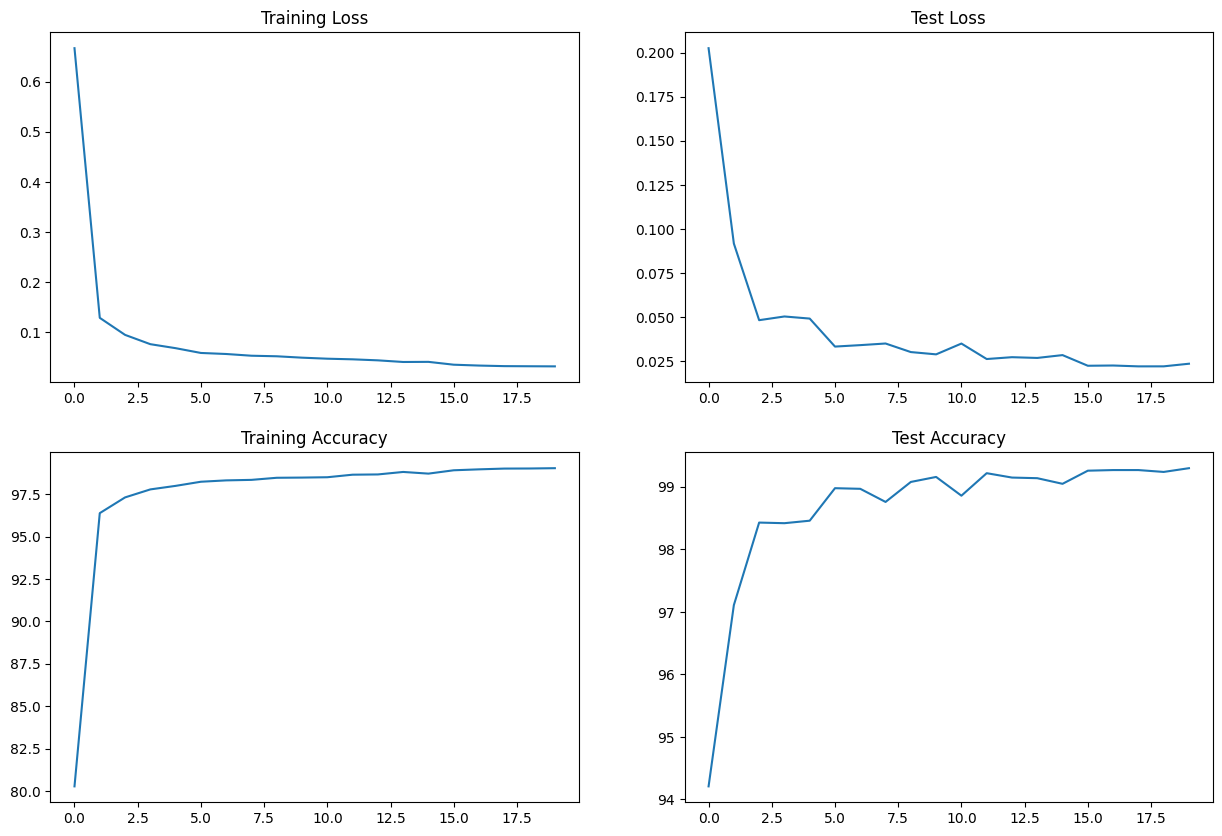

In [ ]:
printTrainTest_LossAcc(train_losses,train_acc,test_losses,test_acc)